# The problem falls under Supervised Learning:Classification
This is because the dependent variable purchased has only two distinct values:Yes or No i.e 0 or 1.
###  Fetching Data from Dataset
We import all required libraries and get the dataset.
I am using xgboost model for the same.

In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_tree

In [2]:
conda install graphviz


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\VEDITA



In [3]:
dataset = pd.read_csv('./Social_Network_Ads.csv', delimiter=",")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data Wrangling

1. We clean the data by understanding the structure of the data.
**We find that the dataset has 400 rows and 5 columns. 

2. We perform statistical analysis of data to find patterns and correlation between age ,salary and purchase.
**We realise that the user id column is just a serial number and does not affect our prediction.
  Hence we remove that column. 
  We also see the mean,variance and we plot a boxplot to visualise the data.
  
3. We see that the gender column has only two values:male and female.
**We categorise the gender into 0 and 1 values.

4. We find if there is any missing data in the dataset.
**No missing data and thus no action required.

5. 
  
 
  



In [5]:
dataset.shape

(400, 5)

In [6]:
dataset.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
#drop column userid
dataset=dataset.drop('User ID',axis=1)

In [10]:
#convert gender into category and assign codes to it.
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [11]:
#check if any data is missing
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## EDA
Boxplots are used to find how data is distributed across various parameters.
Paiplots are used to understand relationship attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built-in function to create a matrix of scatter plots of all attributes against all attributes

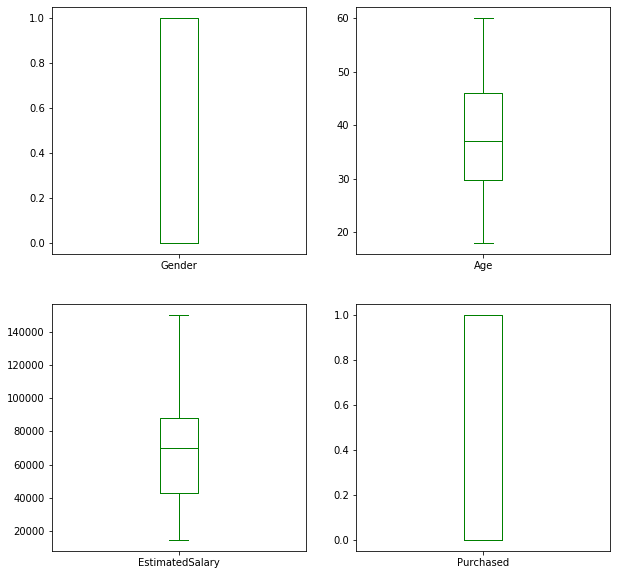

In [12]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,color="green", figsize=(10,10))
plt.show()

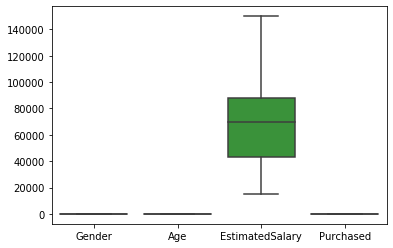

In [13]:
import seaborn as sns
sns.boxplot(data=dataset)

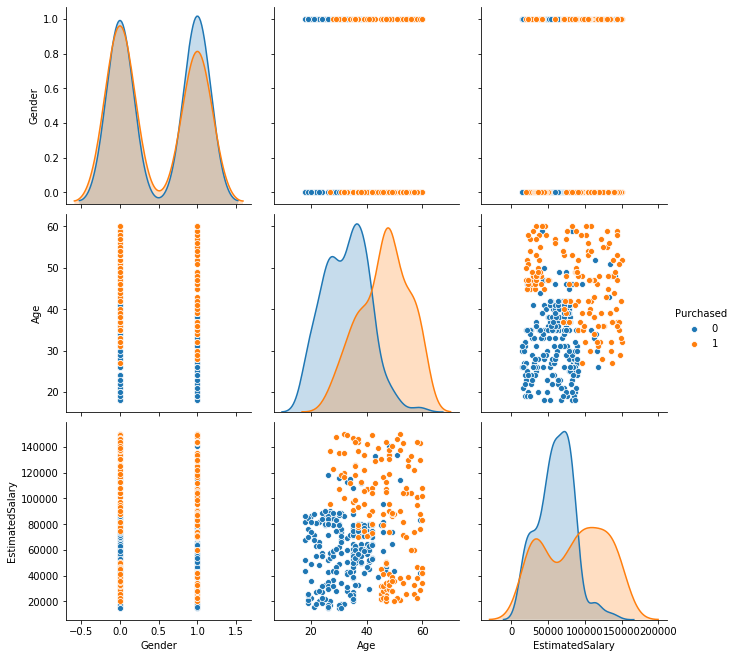

In [14]:
sns.pairplot(dataset, hue="Purchased", height=3, diag_kind="kde")
plt.show()

                   Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000


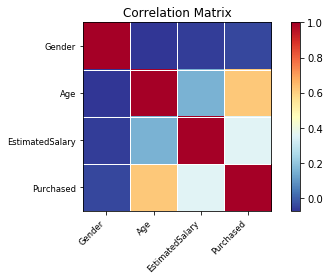

In [15]:
corr = dataset.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Training and testing the model

In [21]:
#testset
Y = dataset['Purchased']

In [22]:
#training set
X = dataset.drop('Purchased',axis=1)

In [23]:
seed = 9
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [24]:
#using xgb model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [26]:

y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [27]:
y_test.values

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [28]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.25%
